In [1]:
import os

import numpy as np
import pandas

import networkx as nx
import matplotlib.pyplot as plt


In [2]:
gml_G = nx.read_gml("fast_retweet.gml.gz")

FileNotFoundError: [Errno 2] No such file or directory: 'fast_retweet.gml.gz'

In [7]:
ROOT_DIR = "./outputs"
FASTRETWEET_DIR = 'plt_countrywise_fastretweet.gexf'
HASHTAG_DIR = "plt_hashtag_country_wise.gexf"

In [8]:
fast_retweet_graph = nx.read_gexf(os.path.join(ROOT_DIR,FASTRETWEET_DIR))
hash_tag_graph = nx.read_gexf(os.path.join(ROOT_DIR,HASHTAG_DIR))

In [9]:
import random
def random_color():
    levels = range(32, 256, 32)
    return tuple(random.choice(levels)/255 for _ in range(3))


In [39]:
def draw_countrywise(graph,method_name):
    G = nx.Graph()

    countries = set([graph.nodes[node]['country']
                    for node in list(graph.nodes)])

    for country in countries:
        G.add_node(country, node_color=random_color())
    country_colors = [random_color() for _ in countries]

    for edge in graph.edges:
        from1, to = edge
        from_country = graph.nodes[from1]['country']
        to_country = graph.nodes[to]['country']
        if G.has_edge(from_country, to_country):
            # we added this one before, just increase the weight by one
            G[from_country][to_country]['weight'] += 0.0033
        else:
            # new edge. add with weight=1
            G.add_edge(from_country, to_country, weight=0.1)


    G.remove_edges_from(nx.selfloop_edges(G))

    weights = [G[u][v]['weight'] for u, v in G.edges]
    pos = nx.spring_layout(G, k=100.85)
    nx.draw(G, pos, with_labels=True, node_color=country_colors, width=weights)
    plt.savefig(method_name+"_image.png")
    plt.show()


def draw_countrywise_avg_weight(graph, method_name,attribute_name):
    G = nx.Graph()

    countries = set([graph.nodes[node]['country']
                    for node in list(graph.nodes)])

    for country in countries:
        G.add_node(country, node_color=random_color())
    country_colors = [random_color() for _ in countries]

    attribute_dict = nx.get_edge_attributes(graph, attribute_name)
    country_count_dict = {}

    for edge,value in attribute_dict.items():
        from1, to = edge
        from_country = graph.nodes[from1]['country']
        to_country = graph.nodes[to]['country']

        if G.has_edge(from_country, to_country):
            # we added this one before, just increase the weight by one
            G[from_country][to_country]['weight'] += value*0.05
            country_count_dict[(from_country,to_country)]+=1
            country_count_dict[(to_country, from_country)] += 1
        else:
            # new edge. add with weight=1
            G.add_edge(from_country, to_country, weight=value*0.3)
            country_count_dict[(from_country, to_country)] = 1
            country_count_dict[(to_country,from_country)] = 1

    G.remove_edges_from(nx.selfloop_edges(G))

    weights = [G[u][v]['weight']/country_count_dict[(u,v)] for u, v in G.edges]
    pos = nx.spring_layout(G, k=100.85)
    nx.draw(G, pos, with_labels=True, node_color=country_colors, width=weights)
    plt.savefig(method_name+"_image_attr_avg.png")
    plt.show()


def draw_countrywise_labelwise(graph, method_name,class_label):
    G = nx.Graph()

    countries = set([graph.nodes[node]['country']
                    for node in list(graph.nodes)])
    
    n_attr_dict = graph.nodes(data=True)

    for country in countries:
        G.add_node(country, node_color=random_color())
    country_colors = [random_color() for _ in countries]

    for edge in graph.edges:
        from1, to = edge
        from_country = graph.nodes[from1]['country']
        to_country = graph.nodes[to]['country']
        if((n_attr_dict[from1]["class_label"] == n_attr_dict[to]["class_label"]) and n_attr_dict[from1]["class_label"] == class_label):
            if G.has_edge(from_country, to_country):
                # we added this one before, just increase the weight by one
                G[from_country][to_country]['weight'] += 0.00002
            else:
                # new edge. add with weight=1
                G.add_edge(from_country, to_country, weight=0.21)

    G.remove_edges_from(nx.selfloop_edges(G))

    weights = [G[u][v]['weight'] for u, v in G.edges]
    pos = nx.spring_layout(G, k=100.85)
    nx.draw(G, pos, with_labels=True, node_color=country_colors, width=weights)
    plt.savefig(method_name+"_image_"+class_label+".png")
    plt.show()



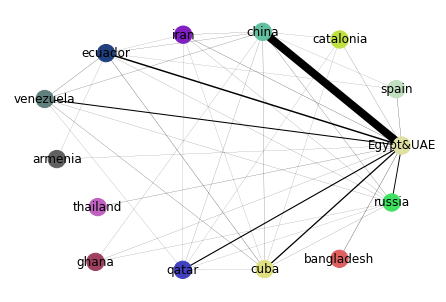

In [40]:
draw_countrywise(fast_retweet_graph,"fast_retweet",)

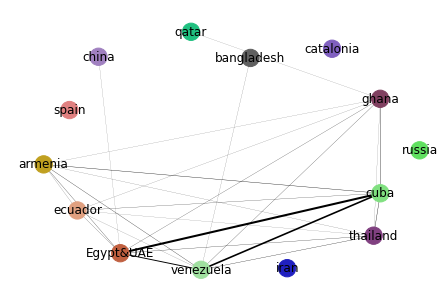

In [103]:
draw_countrywise_labelwise(hash_tag_graph,"hash_tag","treated")